In [20]:
%matplotlib inline
from __future__ import absolute_import
from __future__ import print_function

import random
import zipfile
import itertools

import numpy as np
import tensorflow as tf
import csv
import collections
import math

import pandas as pd

import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

In [ ]:
##########################################################################################################################
#Initial Processing and Analysis

In [2]:
# Read the preprocessed data into a string. Preprocessed data is a list of rows in the form: article_id, pacs1, pacs2, pac3...
datafile = open('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/aps.dat', 'r',)
datareader = csv.reader(datafile)
article_pacs = []
for row in datareader:
    # I split the input string based on the tab separator
    article_pacs.append( [ elem for elem in row[0].split(" ") ] )

In [3]:
#Calculating the number of article per years to determine the time range of the analysis
ArticlePacsPerYear={}
cont_item=0
for item in article_pacs:
    year=item[1][:4]
    article_id=item[0]
    pacs_codes=item[2:]
    codes=[]
    for pacs in pacs_codes:
        if len(pacs)>0:
            pacs=pacs.replace("−","-")
            codes.append(pacs)
    article_codes=[article_id]+codes
    try:
        ArticlePacsPerYear[year]=ArticlePacsPerYear[year]+[article_codes]
    except KeyError:
        ArticlePacsPerYear[year]=[article_codes]
    #print(cont_item,end="\r")
    cont_item=cont_item+1
    
years=ArticlePacsPerYear.keys()
years.sort()

articles_per_year=[len(ArticlePacsPerYear[year]) for year in years]

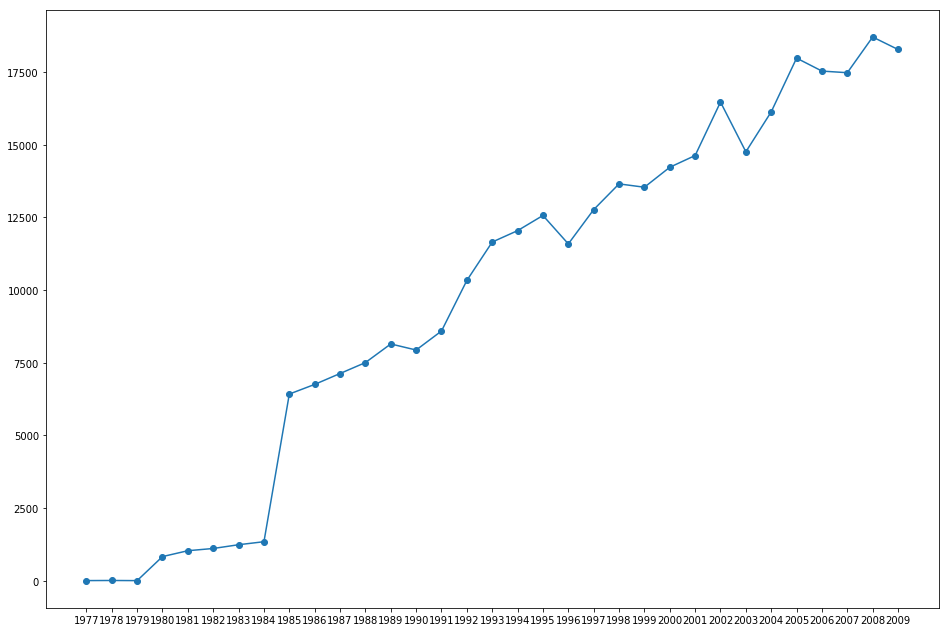

In [4]:
#We focus on the time period 1985-2009
plt.figure(figsize=(16,11))
plt.plot(years,articles_per_year,"-o")
plt.show()

In [6]:
AllPacsPerYear=[]
AllPacs=[]
for year in years:
    block=ArticlePacsPerYear[year]
    block_pacs=[]
    for item in block:
        pacs=item[1:]
        block_pacs.extend(pacs)
    block_pacs_list=map(list,zip(Counter(block_pacs).keys(),Counter(block_pacs).values()))
    block_pacs_list.sort(key=lambda x:x[1],reverse=True)
    AllPacsPerYear.append(block_pacs_list)
    AllPacs.extend(block_pacs)
AllPacs=list(set(AllPacs))
AllPacs.sort()

In [7]:
PacsCoupleFirstDate={}
for item in article_pacs:
    date=item[1]
    article_id=item[0]
    pacs_codes=item[2:]
    codes=[]
    for pacs in pacs_codes:
        if len(pacs)>0:
            codes.append(pacs)
    pacs_couples=itertools.combinations(codes,2)
    for couple in pacs_couples:
        try:
            couple_date=PacsCoupleFirstDate[couple[0]+" "+couple[1]]
            if date<couple_date:
                PacsCoupleFirstDate[couple[0]+" "+couple[1]]=date
                PacsCoupleFirstDate[couple[1]+" "+couple[0]]=date
        except KeyError:
            PacsCoupleFirstDate[couple[0]+" "+couple[1]]=date
            PacsCoupleFirstDate[couple[1]+" "+couple[0]]=date

In [8]:
PacsCoupleFirstDateDF=pd.DataFrame(map(list,zip(PacsCoupleFirstDate.keys(),PacsCoupleFirstDate.values())))
PacsCoupleFirstDateDF.columns=["Pacs Couple","Fist Date"]

In [12]:
PacsCoupleFirstDateDF

,Pacs Couple,Fist Date
0,03.20.+i 82.20.Rp,1994-08-01
1,82.20.Wt 68.35.Fx,1989-07-17
2,61.70.Dx 33.20.Ea,1991-08-15
3,61.05.fg 65.40.G-,2008-01-01
4,79.20.La 71.15.Mb,2006-11-03
5,13.20.Fc 14.40.Nd,2008-07-01
6,11.15.Ha 12.38.−t,2005-04-15
7,71.55.Jv 73.63.Fg,2007-12-15
8,32.80.-t 89.80.+h,1995-11-01
9,65.80.+n 05.20.Dd,2003-12-01


In [9]:
PacsCoupleFirstDateDF.to_csv('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACSFirstDate.txt',index=False)

In [11]:
#PacsDescriptionRaw=pd.read_csv('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS name raw.txt',header=None,sep="\t")

In [ ]:
"01.30.−y"

In [8]:
PacsDescription6={}
PacsDescription4={}
for item in PacsDescriptionRaw.values:
    string=item[0]
    string=string.strip()
    string=string.replace("−","-")
    pacs=string[:8]
    description=str(string[9:],)
    PacsDescription6[pacs]=description
    if pacs[6:9][0]=="-"  or pacs[6:9][0]=="+":
        PacsDescription4[pacs[:5]]=description

NameError: name 'PacsDescriptionRaw' is not defined

In [ ]:
len(PacsDescription4)

In [13]:
Pacs4CoupleFirstDate={}
for item in article_pacs:
    date=item[1]
    article_id=item[0]
    pacs_codes=item[2:]
    codes=[]
    for pacs in pacs_codes:
        if len(pacs)>0:
            pacs=pacs.replace("−","-")
            codes.append(pacs[:5])
    pacs_couples=itertools.combinations(codes,2)
    for couple in pacs_couples:
        try:
            couple_date=Pacs4CoupleFirstDate[couple[0]+" "+couple[1]]
            if date<couple_date:
                Pacs4CoupleFirstDate[couple[0]+" "+couple[1]]=date
                Pacs4CoupleFirstDate[couple[1]+" "+couple[0]]=date
        except KeyError:
            Pacs4CoupleFirstDate[couple[0]+" "+couple[1]]=date
            Pacs4CoupleFirstDate[couple[1]+" "+couple[0]]=date   

In [14]:
Pacs4CoupleFirstDateDF=pd.DataFrame(map(list,zip(Pacs4CoupleFirstDate.keys(),Pacs4CoupleFirstDate.values())))
Pacs4CoupleFirstDateDF.columns=["Pacs Couple","Fist Date"]
Pacs4CoupleFirstDateDF.to_csv('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS4FirstDate.txt',index=False)

In [ ]:
ArticlePacs4PerYear={}
cont_item=0
for item in article_pacs:
    year=item[1][:4]
    article_id=item[0]
    pacs_codes=item[2:]
    codes=[]
    for pacs in pacs_codes:
        if len(pacs)>0:
            pacs=pacs.replace("−","-")
            codes.append(pacs[:5])
    article_codes=[article_id]+codes
    try:
        ArticlePacs4PerYear[year]=ArticlePacs4PerYear[year]+[article_codes]
    except KeyError:
        ArticlePacs4PerYear[year]=[article_codes]
    print(cont_item,end="\r")
    cont_item=cont_item+1

In [ ]:
NumberOfPacs=[]
for moving_year in range(1985,2009+1):
    start_year=moving_year
    end_year=start_year
    block_articles=[]
    for year in range(start_year,end_year+1):
        block_articles.extend(ArticlePacs4PerYear[str(year)])
    block_articles=list(map(list,set(map(tuple,block_articles))))
    new_block_articles=[]
    all_pacs4=[]
    for item in block_articles:
        article_id=item[0]
        pacs=item[1:]
        pacs=list(set(pacs))
        if len(pacs)>=2:
            new_block_articles.append([article_id]+pacs)
            all_pacs4.extend(pacs)
    all_pacs4=set(all_pacs4)
    NumberOfPacs.append(len(all_pacs4))
    
    with open('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Input Files/PACS4Inputs'+str(start_year)+'-'+str(end_year)+'.csv', 'w') as mycsvfile:
        thedatawriter = csv.writer(mycsvfile,delimiter='\t')
        for row in new_block_articles:
            thedatawriter.writerow(row)

In [ ]:
#Calculating the 
for moving_year in range(1985,2009+1):
    start_year=moving_year
    end_year=start_year

    datafile = open('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Input Files/PACS4Inputs'+str(start_year)+'-'+str(end_year)+'.csv', 'r')
    datareader = csv.reader(datafile)
    mydata = []
    for row in datareader:
        # I split the input string based on the tab separator
        mydata.append( [ elem for elem in row[0].split("\t") ] )
        
    pacs_couples=[]
    for item in mydata:
        codes=item[1:]
        codes.sort()
        couples=list(itertools.combinations(codes,2))
        couples_single=[item[0]+" "+item[1] for item in couples]
        pacs_couples.extend(couples_single)
        
    CouplesCooccurrencesDictionary=Counter(pacs_couples)
    
    Cooccurrences=pd.DataFrame(zip(CouplesCooccurrencesDictionary.keys(),CouplesCooccurrencesDictionary.values()))
    Cooccurrences.columns=["Couple","Cooccurrence"]
    
    Cooccurrences.to_csv('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Input Files/PACS4Cooccurrences'+str(start_year)+'-'+str(end_year)+'.csv',index=False)
    
    print(moving_year,end="\r")

In [ ]:
    pacs_couples=[]
    for item in mydata:
        codes=item[1:]
        codes.sort()
        couples=list(itertools.combinations(codes,2))
        couples_single=[item[0]+" "+item[1] for item in couples]
        pacs_couples.extend(couples_single)

In [ ]:
    CouplesCooccurrencesDictionary=Counter(pacs_couples)

In [25]:
mydata

[['260483', '04.65', '11.17', '11.30'],
 ['102736', '31.15', '03.80', '11.80', '21.40'],
 ['357289', '36.40', '71.45', '73.20'],
 ['256142', '64.70', '61.40'],
 ['82506', '13.60', '12.40'],
 ['121129', '21.40', '21.10', '27.10'],
 ['415228', '29.25', '29.20'],
 ['275592', '03.20', '03.65', '32.80', '31.50'],
 ['129796', '61.50', '34.15', '62.20'],
 ['170433', '71.55', '61.70', '73.40'],
 ['185780', '78.70', '61.80', '66.30'],
 ['301435', '75.50', '65.70'],
 ['82960', '04.20', '98.80'],
 ['406848', '25.80', '14.20', '25.40'],
 ['112049', '79.20', '34.70'],
 ['22124', '96.40', '98.80', '12.10'],
 ['419900', '71.20', '71.25', '74.70', '74.10'],
 ['282763', '13.75', '12.40', '13.40'],
 ['232539', '68.40', '64.60', '05.70'],
 ['379708', '42.60', '42.55', '42.50'],
 ['182762', '47.20', '44.25', '47.25'],
 ['7895', '12.40', '14.20', '11.30', '13.30'],
 ['168456', '05.70', '64.60', '64.70'],
 ['45578', '72.15', '72.10', '73.50'],
 ['334899', '72.15', '63.20'],
 ['388275', '12.15', '12.40', '13

In [ ]:
##########################################################################################################################
#Creation of the Embeddings

In [29]:
def build_dataset(words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count += 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys()))
    return data, count, dictionary, reverse_dictionary


In [31]:
# Read the data into a string.
for moving_year in range(1995,2006):
    start_year=moving_year
    end_year=start_year+4

    datafile = open('/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Input Files/PACS4Inputs'+str(start_year)+'-'+str(end_year)+'.csv', 'r')
    datareader = csv.reader(datafile)
    mydata = []
    for row in datareader:
        # I split the input string based on the tab separator
        mydata.append( [ elem for elem in row[0].split("\t") ] )

    # Step 2: Build the dictionary and replace rare words with UNK token.

    flatcodes=[item for sublist in mydata for item in sublist[1:]]
    lengths=[len(sub) for sub in mydata]
    accumulated=[0]
    acc=0
    for l in lengths:
        acc += l-1
        accumulated.extend([acc])
    
    vocabulary_size = len(set(flatcodes))

    data, count, dictionary, reverse_dictionary = build_dataset(flatcodes)
    #del words  # Hint to reduce memory.
    print('Most common words (+UNK)', count[:5])
    print('Sample data', data[:10])

    NRun=30
    for cont_run in range(0,NRun):
        # Step 3: Function to generate a training batch for the skip-gram model.
        examp_num=4
        batch_size=30

        def my_generate_batch(examp_num, batch_size):
            batch=np.array([], dtype=np.int32)
            labels=np.array([], dtype=np.int32)

            while (len(batch)<=batch_size):
                #select patent
                y=random.randint(0, len(accumulated)-2)
                #find relevant portion of flattened dataset
                sel=data[accumulated[y]:accumulated[y+1]]
                #randomize order
                permsel=np.random.permutation(sel)
                #take first code as input
                inp=permsel[0]
                #following ones as output
                labels_t=permsel[1:examp_num]
                #repeat input to fit desired batch format
                batch_t = np.array([inp for _ in range(len(labels_t))])
                #append to batch
                batch = np.concatenate((batch, batch_t), axis=0)
                labels = np.concatenate((labels, labels_t), axis=0)
            batch = batch[:batch_size]
            labels = labels[:batch_size]
            labels = labels.reshape((len(labels), 1))
            return batch, labels

        batch, labels = my_generate_batch(examp_num, batch_size)

        #Step 4: Build and train a skip-gram model.

        batch_size = 128
        embedding_size = 16  # Dimension of the embedding vector.
        examp_num = 8         # How many times to reuse an input to generate a label.

        # We pick a random validation set to sample nearest neighbors. Here we limit the
        # validation samples to the words that have a low numeric ID, which by
        # construction are also the most frequent.
        valid_size = 16     # Random set of words to evaluate similarity on.
        valid_window = 100  # Only pick dev samples in the head of the distribution.
        valid_examples = np.array(random.sample(np.arange(valid_window), valid_size))
        num_sampled = 64    # Number of negative examples to sample.

        graph = tf.Graph()

        with graph.as_default():

            # Input data.
            train_inputs = tf.placeholder(tf.int32, shape=[batch_size])
            train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
            valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

            # Ops and variables pinned to the CPU because of missing GPU implementation
            with tf.device('/cpu:0'):
                # Look up embeddings for inputs.
                embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
                embed = tf.nn.embedding_lookup(embeddings, train_inputs)

                # Construct the variables for the NCE loss
                nce_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / math.sqrt(embedding_size)))
                nce_biases = tf.Variable(tf.zeros([vocabulary_size]))

            # Compute the average NCE loss for the batch.
            # tf.nce_loss automatically draws a new sample of the negative labels each
            # time we evaluate the loss.
            loss = tf.reduce_mean(tf.nn.nce_loss(weights=nce_weights, biases=nce_biases, labels=train_labels, 
                                                 inputs=embed,num_sampled=num_sampled, num_classes=vocabulary_size))

            # Construct the SGD optimizer using a learning rate of 1.0.
            optimizer = tf.train.GradientDescentOptimizer(1.0).minimize(loss)

            # Compute the cosine similarity between minibatch examples and all embeddings.
            norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
            normalized_embeddings = embeddings / norm
            valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
            similarity = tf.matmul(valid_embeddings, normalized_embeddings, transpose_b=True)

            # Step 5: Begin training.
        num_steps = 50000

        with tf.Session(graph=graph) as session:
            # We must initialize all variables before we use them.
            tf.global_variables_initializer().run()
            print("Initialized")

            average_loss = 0
            for step in xrange(num_steps):
                batch_inputs, batch_labels = my_generate_batch(examp_num, batch_size)
                feed_dict = {train_inputs : batch_inputs, train_labels : batch_labels}

                # We perform one update step by evaluating the optimizer op (including it
                # in the list of returned values for session.run()
                _, loss_val = session.run([optimizer, loss], feed_dict=feed_dict)
                average_loss += loss_val

            final_embeddings = normalized_embeddings.eval()


        if(cont_run==0):
            codestoexp = [reverse_dictionary[i] for i in range(vocabulary_size)]
            np.savetxt("/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Embeddings/Pacs4"+str(vocabulary_size)+"_"+str(start_year)+"-"+str(end_year)+"-"+str(embedding_size)+".txt", codestoexp, fmt="%s")


        np.savetxt("/home/andrean/Desktop/PostDoc Programs/PostDoc Program Data/PACS EMBEDDINGS/Embeddings/Pacs4Run_"+str(cont_run)+"_VS_"+str(vocabulary_size)
                   +"_embeddings"+str(start_year)+"-"+str(end_year)+"ED"+str(embedding_size)+".txt", final_embeddings)

Most common words (+UNK) [['UNK', 1], ('73.20', 3447), ('42.50', 2513), ('64.60', 2478), ('03.65', 2415)]
Sample data [78, 113, 81, 4, 9, 163, 295, 259, 67, 4]
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Most common words (+UNK) [['UNK', 1], ('73.20', 3344), ('42.50', 2533), ('03.65', 2527), ('64.60', 2405)]
Sample data [78, 111, 82, 3, 6, 173, 124, 1, 68, 49]
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initialized
Initializ